<a href="https://colab.research.google.com/github/poliduckie/MPC/blob/main/dataset_genaration/Dataset_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rjean/duckie-segmentation.git
%cd duckie-segmentation/
%cd dataset_generator
!ls
!pip3 install -e .

Cloning into 'duckie-segmentation'...
remote: Enumerating objects: 2063, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 2063 (delta 5), reused 13 (delta 5), pack-reused 2049
Receiving objects: 100% (2063/2063), 98.33 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (1035/1035), done.
Checking out files: 100% (469/469), done.
/content/duckie-segmentation
/content/duckie-segmentation/dataset_generator
benchmark.py	      joystick_control.py  requirements.pin.txt
dataset_generator.py  learning		   requirements.txt
docker		      LICENSE.pdf	   run_tests.py
Dockerfile	      Makefile		   setup.py
environment.yaml      MANIFEST.in	   src
exercises	      manual_control.py    test_segmentation.py
free_camera.py	      media
genduck.py	      README.md
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/duckie-segmentation/dataset_generator
     |████████████████

## huhuh


In [2]:
!pip install pyglet==1.5.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 12.9 MB/s 
  Attempting uninstall: pyglet
    Found existing installation: pyglet 1.5.0
    Uninstalling pyglet-1.5.0:
      Successfully uninstalled pyglet-1.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
duckietown-gym-daffy 6.0.25 requires pyglet<=1.5.0, but you have pyglet 1.5.11 which is incompatible.


In [3]:
# install required system dependencies
!apt-get install -y xvfb x11-utils
# install required python dependencies
!pip install gym[box2d]==0.17.* \
            pyvirtualdisplay==0.2.* \
            PyOpenGL==3.1.* \
            PyOpenGL-accelerate==3.1.*
!pip install pyvirtualdisplay

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 12 not upgraded.
Need to get 994 kB of archives.
After this operation, 2,982 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.11 [785 kB]
Fetched 994 kB in 0s (10.2 MB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 123934 file

In [4]:
!ls
%cd src
!ls

!export PYGLET_DEBUG_GL=True  #better performance

benchmark.py	      joystick_control.py  requirements.pin.txt
dataset_generator.py  learning		   requirements.txt
docker		      LICENSE.pdf	   run_tests.py
Dockerfile	      Makefile		   setup.py
environment.yaml      MANIFEST.in	   src
exercises	      manual_control.py    test_segmentation.py
free_camera.py	      media
genduck.py	      README.md
/content/duckie-segmentation/dataset_generator/src
duckietown_gym_daffy.egg-info  gym_duckietown


In [12]:
# create gym_duckietown/randomization/config/Fake_randomizer_config.json file

%%bash

echo '{ 
    "horz_mode": {
        "type": "uniform",
        "low": 0,
        "high": 0
    },
    "light_pos": {
        "type": "uniform",
        "low": [-40, 200, 100],
        "high": [-40, 200, 100],
        "size": 3
    },
    "camera_noise": {
        "type": "uniform",
        "low": 0,
        "high": 0,
        "size": 3
    },
    "trim": {
        "type": "normal",
        "loc": 0,
        "scale": 0
    },
    "camera_height": {
        "type": "uniform",
        "low": 1,
        "high": 1
    },
    "camera_angle": {
        "type": "uniform",
        "low": 1,
        "high": 1
    },
    "camera_fov_y": {
        "type": "uniform",
        "low": 1,
        "high": 1
    }
}' > gym_duckietown/randomization/config/Fake_randomizer_config.json





echo '{ 
    "horz_mode": {
        "type": "uniform",
        "low": 0,
        "high": 0
    },
    "light_pos": {
        "type": "uniform",
        "low": [-40, 200, 100],
        "high": [-40, 200, 100],
        "size": 3
    },
    "camera_noise": {
        "type": "uniform",
        "low": 0,
        "high": 1,
        "size": 3
    },
    "trim": {
        "type": "normal",
        "loc": 0,
        "scale": 1
    },
    "camera_height": {
        "type": "uniform",
        "low": 1,
        "high": 1
    },
    "camera_angle": {
        "type": "uniform",
        "low": 1,
        "high": 1
    },
    "camera_fov_y": {
        "type": "uniform",
        "low": 1,
        "high": 1
    }
}' > gym_duckietown/randomization/config/Fake_randomizer_config2.json


In [13]:
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()


/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


env reset
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:200: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


env reset
1
env reset
2
env reset
0
env reset
1
env reset
2


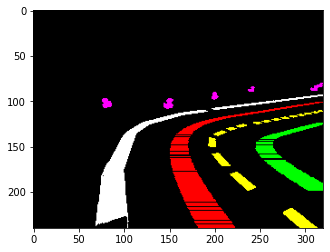

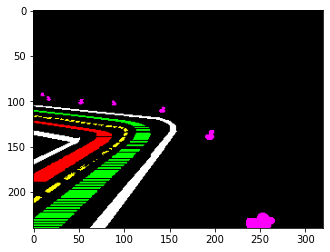

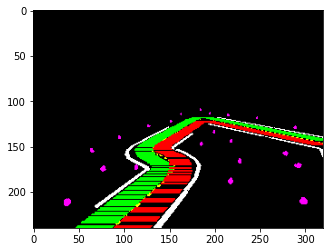

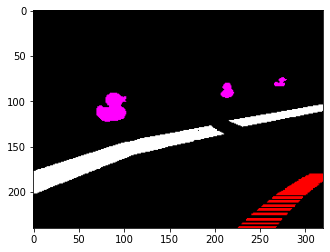

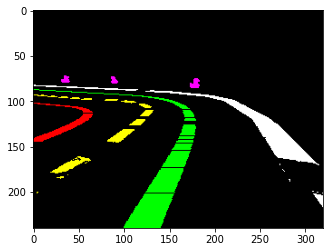

In [14]:

%matplotlib inline
from gym_duckietown.simulator import Simulator
from pyglet import app, clock
from pyglet.window import key
import matplotlib.pyplot as plt

import sys
import argparse
import numpy as np
import gym
import gym_duckietown
from gym_duckietown.envs import DuckietownEnv
from gym_duckietown.wrappers import UndistortWrapper
from datetime import datetime
import os
from skimage.io import imsave
import logging
import cv2 as cv

from gym_duckietown.objects import WorldObj
from gym_duckietown.objmesh import ObjMesh
from gym_duckietown.randomization.randomizer import Randomizer


# We hardcode options
class tmp():
    def __init__(self):
        self.env_name = None
        self.map_name = 'udem1'
        self.distortion = False
        self.draw_curve = False
        self.draw_bbox = False
        self.domain_rand = True
        self.frame_skip = 1
        self.seed = 2
        self.dataset_size = 3
        self.dataset_path = 'dataset/image_'
        self.compress = False
        self.split = 2000
        self.resize = -1

args = tmp()

args.env_name = 'Duckietown-udem1-v0'
args.map_name = 'loop_empty'
args.dataset_size = 3
args.resize = 2

env = DuckietownEnv(
    seed = args.seed,
    map_name = args.map_name,
    draw_curve = args.draw_curve,
    draw_bbox = args.draw_bbox,
    domain_rand = True,
    frame_skip = args.frame_skip,
    distortion = args.distortion,
)

env_not_rand = DuckietownEnv(
    seed = args.seed,
    map_name = args.map_name,
    draw_curve = args.draw_curve,
    draw_bbox = args.draw_bbox,
    domain_rand = False,
    frame_skip = args.frame_skip,
    distortion = args.distortion,
)

logging.basicConfig()
logger = logging.getLogger('gym-duckietown')
logger.setLevel(logging.WARNING)

pos_ds = np.zeros((args.dataset_size, env.cur_pos.shape[0]))
angle_ds = np.zeros((args.dataset_size, 1))

if not args.compress:
    image_ds = np.zeros((args.split, env.camera_height, env.camera_width, 3), dtype=np.uint8)
image_count = 0



# Creating dataset directories if they do not exist
if not os.path.exists(args.dataset_path):
    os.makedirs(args.dataset_path)

if not os.path.exists(os.path.join(args.dataset_path, "wo_bezier")):
    os.makedirs(os.path.join(args.dataset_path, "wo_bezier"))

if not os.path.exists(os.path.join(args.dataset_path, "wo_bezier", 'labels_rand')):
    os.makedirs(os.path.join(args.dataset_path, "wo_bezier", 'labels_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "wo_bezier", 'rgb_orig_rand')):
    os.makedirs(os.path.join(args.dataset_path, "wo_bezier", 'rgb_orig_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "wo_bezier", 'rgb_ss_rand')):
    os.makedirs(os.path.join(args.dataset_path, "wo_bezier", 'rgb_ss_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "w_bezier")):
    os.makedirs(os.path.join(args.dataset_path, "w_bezier"))

if not os.path.exists(os.path.join(args.dataset_path, "w_bezier", 'labels_rand')):
    os.makedirs(os.path.join(args.dataset_path, "w_bezier", 'labels_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "w_bezier", 'rgb_orig_rand')):
    os.makedirs(os.path.join(args.dataset_path, "w_bezier", 'rgb_orig_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "w_bezier", 'rgb_ss_rand')):
    os.makedirs(os.path.join(args.dataset_path, "w_bezier", 'rgb_ss_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "bezier_only")):
    os.makedirs(os.path.join(args.dataset_path, "bezier_only"))

if not os.path.exists(os.path.join(args.dataset_path, "bezier_only", 'labels_rand')):
    os.makedirs(os.path.join(args.dataset_path, "bezier_only", 'labels_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "bezier_only", 'rgb_orig_rand')):
    os.makedirs(os.path.join(args.dataset_path, "bezier_only", 'rgb_orig_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "bezier_only", 'rgb_ss_rand')):
    os.makedirs(os.path.join(args.dataset_path, "bezier_only", 'rgb_ss_rand'))

# without domain randomization

if not os.path.exists(os.path.join(args.dataset_path, "wo_bezier")):
    os.makedirs(os.path.join(args.dataset_path, "wo_bezier"))

if not os.path.exists(os.path.join(args.dataset_path, "wo_bezier", 'labels_not_rand')):
    os.makedirs(os.path.join(args.dataset_path, "wo_bezier", 'labels_not_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "wo_bezier", 'rgb_orig_not_rand')):
    os.makedirs(os.path.join(args.dataset_path, "wo_bezier", 'rgb_orig_not_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "wo_bezier", 'rgb_ss_not_rand')):
    os.makedirs(os.path.join(args.dataset_path, "wo_bezier", 'rgb_ss_not_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "w_bezier")):
    os.makedirs(os.path.join(args.dataset_path, "w_bezier"))

if not os.path.exists(os.path.join(args.dataset_path, "w_bezier", 'labels_not_rand')):
    os.makedirs(os.path.join(args.dataset_path, "w_bezier", 'labels_not_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "w_bezier", 'rgb_orig_not_rand')):
    os.makedirs(os.path.join(args.dataset_path, "w_bezier", 'rgb_orig_not_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "w_bezier", 'rgb_ss_not_rand')):
    os.makedirs(os.path.join(args.dataset_path, "w_bezier", 'rgb_ss_not_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "bezier_only")):
    os.makedirs(os.path.join(args.dataset_path, "bezier_only"))

if not os.path.exists(os.path.join(args.dataset_path, "bezier_only", 'labels_not_rand')):
    os.makedirs(os.path.join(args.dataset_path, "bezier_only", 'labels_not_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "bezier_only", 'rgb_orig_not_rand')):
    os.makedirs(os.path.join(args.dataset_path, "bezier_only", 'rgb_orig_not_rand'))

if not os.path.exists(os.path.join(args.dataset_path, "bezier_only", 'rgb_ss_not_rand')):
    os.makedirs(os.path.join(args.dataset_path, "bezier_only", 'rgb_ss_not_rand'))



env.reset()
env.render()
env_not_rand.reset()
env_not_rand.render()

def update(dt):
    env.render("free_cam")

def save_ss(path, img):
    """
    This function will save the semantic segmenation label in a .npy file
    Parameters
    ----------
    path: path of .npy file
    img: semantic segmentation array
    Returns
    -------
    """
    color_map = {'white': np.array([255, 255, 255]), 'yellow': np.array([255, 255, 0]), 'left': np.array([255, 0, 0]),
                'right': np.array([0, 255, 0]), 'obstacle': np.array([255, 0, 255]), 'background': np.array([0, 0, 0])}

    label_seg = np.zeros((img.shape[:2]), dtype=np.int)
    label_seg[(img == color_map['background']).all(axis=2)] = 0
    label_seg[(img == color_map['white']).all(axis=2)] = 1
    label_seg[(img == color_map['yellow']).all(axis=2)] = 2
    label_seg[(img == color_map['obstacle']).all(axis=2)] = 3
    label_seg[(img == np.array([255, 0, 254])).all(axis=2)] = 3
    label_seg[(img == color_map['left']).all(axis=2)] = 4
    label_seg[(img == np.array([255, 50, 50])).all(axis=2)] = 4
    label_seg[(img == color_map['right']).all(axis=2)] = 5
    label_seg[(img == np.array([50, 255, 50])).all(axis=2)] = 5

    label_arr = label_seg.flatten()
    np.save(path, label_arr)

def regen_img_from_npy(path_npy, path_img='/home/js/PycharmProjects/gym-duckietown-generate-fp/sample/test4.png'):
    """
    This function can be used to verify that .npy file contains the right labels, by regenerating the semantic
    segmentation array from the .npy file.
    Parameters
    ----------
    path_npy: path to the .npy file
    path_img: path where to save the regenerated semantic segmenation image
    Returns
    -------
    """

    color_map = {'white': np.array([255, 255, 255]), 'yellow': np.array([255, 255, 0]), 'left': np.array([255, 0, 0]),
                'right': np.array([0, 255, 0]), 'obstacle': np.array([255, 50, 255]), 'background': np.array([0, 0, 0])}

    ss_arr = np.load(path_npy)
    # ss_2d = ss_arr.reshape((240,320))
    # img = np.zeros((240,320,3))

    ss_2d = ss_arr.reshape((120,160))
    img = np.zeros((120,160,3))

    img[(ss_2d == 2)] = np.array([255, 255, 255]).astype(int)
    img[(ss_2d == 1)] = np.array([255, 255, 0]).astype(int)
    img[(ss_2d == 3)] = np.array([255, 0, 255]).astype(int)
    img[(ss_2d == 4)] = np.array([255, 0, 0]).astype(int)
    img[(ss_2d == 5)] = np.array([0, 255, 100]).astype(int)
    img[(ss_2d == 6)] = np.array([100, 100, 100]).astype(int)
    img[(ss_2d == 7)] = np.array([0, 100, 100]).astype(int)

    imsave(path_img, img)
    #
    # pil_image = PIL.Image.open(
    #     '/home/js/PycharmProjects/gym-duckietown-generate-fp/datasets/image_2020_12_03_15_16_10/bezier_only/bezier.png')
    # img = np.array(pil_image)
    # height, width, _ = img.shape
    # colors = set()
    # for i in range(height):
    #     for j in range(width):
    #         colors.add(str(img[i,j]))
    # print(colors)
    return


def alter_bezier(obs_diff, thick_max=20):
    """
    Parameters
    ----------
    obs_diff: image array corresponding to the observation rendered with the bezier minus that without the bezier. The
    result it thus a black image with only the bezier lines appearing.
    thick_max: desired maximum thickness in terms of pixels of bezier line in semantic segmentation image.
    Returns
    -------
    obs_diff: a semantic segmentation image with bezier lines, correctly labeled depending on if they are on the right
    or left lanes, and thickened for easier training.
    skip_it: a boolean indicating whether this image is safe to use or not. When the uncertainty is too big, we drop it.
    """
    color_map = {'left':[255, 50, 50] , 'right': [50, 255, 50]}
    height = obs_diff.shape[0]
    width = obs_diff.shape[1]

    colors = set()

    # thickening of bezier lines
    for i in range(height):
        teal = []
        yellow = []
        for j in range(width):
            if obs_diff[i,j,0] <=50 and obs_diff[i,j,1] >= 200:
                teal.append(j)
                colors.add(str([0,255,255]))
            elif obs_diff[i,j,2] <=50 and obs_diff[i,j,1] >= 200:
                yellow.append(j)
                colors.add(str([255, 255,0]))
            else:
                obs_diff[i, j] = [0, 0, 0]
                colors.add(str(obs_diff[i, j]))


        thick = np.floor(max(0,(i-(height/3))/(height-(height/3))) * thick_max) + 1

        for k,val in enumerate(teal):
            obs_diff[i,int(max(0,val-thick)):int(min(val+thick+1,width))] = [0, 255, 255]

        for k, val in enumerate(yellow):
            obs_diff[i,int(max(0,val-thick)):int(min(val+thick+1,width))] = [255, 255, 0]

    last_color = []
    right = False
    high_right = 0
    high_left = 0
    set_color_left = set()
    set_color_left.add('[0 0 0]')
    set_color_right = set()
    set_color_right.add('[0 0 0]')
    bottom = False
    left = False
    skip_it = False
    margin = 20 # pixels

    # Long logic for detecting whether bezier lines belong to right lane or left lane. First, we walk along the right
    # edge, then bottom edge, then left edge. We register the last color seen, the set on the right side, the set on
    # left side, whether there are lines crossing the right side, left side and bottom side. Then with all these
    # we are able to determine the classe of each bezier (left or right).
    for i in range(height): # walking around right edge of image
        if not (obs_diff[i, width-1] == [0,0,0]).all() or not (obs_diff[i, width-6] == [0,0,0]).all() or\
                not (obs_diff[i, width-11] == [0,0,0]).all():
            if not (obs_diff[i, width-1] == [0,0,0]).all():
                last_color = obs_diff[i, width-1]
            elif not (obs_diff[i, width-6] == [0,0,0]).all():
                last_color = obs_diff[i, width - 6]
            else:
                last_color = obs_diff[i, width - 11]
            right = True
            set_color_right.add(str(obs_diff[i, width - 1]))
            set_color_right.add(str(obs_diff[i, width - 6]))
            set_color_right.add(str(obs_diff[i, width - 11]))
            if high_right == 0:
                high_right = i
            # print("first" + str(last_color))
    for i in range(width): # then around bottom edge of image
        if not (obs_diff[height-1, i] == [0,0,0]).all():
            last_color = obs_diff[height-1, i]
            bottom = True
            # print("second" + str(last_color))
    for i in range(height): # then around left edge of image
        if not (obs_diff[height-1-i, 0] == [0,0,0]).all() or not (obs_diff[height-1-i, 5] == [0,0,0]).all() \
                or not (obs_diff[height-1-i, 10] == [0,0,0]).all():
            if not (obs_diff[height-1-i, 0] == [0,0,0]).all():
                last_color = obs_diff[height-1-i, 0]
            elif not (obs_diff[height-1-i, 5] == [0,0,0]).all():
                last_color = obs_diff[height-1-i, 5]
            else:
                last_color = obs_diff[height-1-i, 10]
            left = True
            set_color_left.add(str(obs_diff[height-1-i, 0]))
            set_color_left.add(str(obs_diff[height-1-i, 5]))
            set_color_left.add(str(obs_diff[height-1-i, 10]))
            high_left = height-1-i
            # print("third" + str(last_color))
    if len(colors) >= 4:
        "More than 4 colors, filters should be updated."
    elif len(colors) == 3: # if both bezier lines are appearing (includes background color)
        if bottom and (len(set_color_right) > len(set_color_left)):
            # if there is a bezier line crossing the bottom of the image, and there are more bezier lines crossing the
            # right side of the image, then we must be turning right! so the last bezier color seen belongs to the
            # left lane.

            # print("bottom and (len(set_color_right) > len(set_color_left)):")
            # print("set left")
            # print(set_color_left)
            # print("set right")
            # print(set_color_right)
            if (last_color == [0,255,255]).all():
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['left']
                obs_diff[np.all(obs_diff == (255,255,0), axis=-1)] = color_map['right']
            else:
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['left']
                obs_diff[np.all(obs_diff == (0,255,255), axis=-1)] = color_map['right']
        elif bottom and (len(set_color_left) > len(set_color_right)):
            # if there is a bezier line crossing the bottom of the image, and there are more bezier lines crossing the
            # left side of the image, then we must be turning left! so the last bezier color seen belongs to the
            # right lane.

            # print("bottom and (len(set_color_left) > len(set_color_right)):")
            if (last_color == [0,255,255]).all():
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['right']
                obs_diff[np.all(obs_diff == (255,255,0), axis=-1)] = color_map['left']
            else:
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['right']
                obs_diff[np.all(obs_diff == (0,255,255), axis=-1)] = color_map['left']
        elif right and not left:
            # if there are no bezier crossing the bottom of the image and only bezier lines crossing the right side,
            # then the last line color belongs to the left lane.
            # print("right and not left")
            if (last_color == [0,255,255]).all():
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['left']
                obs_diff[np.all(obs_diff == (255,255,0), axis=-1)] = color_map['right']
            else:
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['left']
                obs_diff[np.all(obs_diff == (0,255,255), axis=-1)] = color_map['right']
        elif left and not right:
            # if there are no bezier crossing the bottom of the image and only bezier lines crossing the left side,
            # then the last line color belongs to the right lane.
            # print("left and not right")
            if (last_color == [0,255,255]).all():
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['right']
                obs_diff[np.all(obs_diff == (255,255,0), axis=-1)] = color_map['left']
            else:
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['right']
                obs_diff[np.all(obs_diff == (0,255,255), axis=-1)] = color_map['left']
        elif high_left + margin <= high_right:
            # print("high_left + margin <= high_right:")
            if (last_color == [0,255,255]).all():
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['right']
                obs_diff[np.all(obs_diff == (255,255,0), axis=-1)] = color_map['left']
            else:
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['right']
                obs_diff[np.all(obs_diff == (0,255,255), axis=-1)] = color_map['left']
        elif high_right + margin <= high_left:
            # print("high_right + margin <= high_left:")
            if (last_color == [0,255,255]).all():
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['left']
                obs_diff[np.all(obs_diff == (255,255,0), axis=-1)] = color_map['right']
            else:
                obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['left']
                obs_diff[np.all(obs_diff == (0,255,255), axis=-1)] = color_map['right']
        else:
            # there is too much uncertainty, skip this image
            # print("skip_it")
            skip_it = True
    elif len(colors) == 2:
        # print("len(colors)==2")
        if bottom and left and not right:
            obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['right']
        elif bottom and right and not left:
            obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['left']
        elif left and not right:
            obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['right']
        elif right and not left:
            obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['left']
        elif high_left <= high_right:
            obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['right']
        elif high_left > high_right:
            obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['left']
        else:
            skip_it = True
        # if env.get_lane_pos2(env.cur_pos, env.cur_angle).angle_rad <= 0:
        #     obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['left']
        # else:
        #     obs_diff[np.all(obs_diff == last_color, axis=-1)] = color_map['right']
    else:
        print("no bezier curve visible")
    return obs_diff, skip_it



def alter_ss(obs_ss, obs_diff):
    """
    This function will clean up the semantic segmentation and add in the bezier lines.
    Parameters
    ----------
    obs_ss: semantic segmented image array
    obs_diff: image containing the thickened bezier lines, in the right colors
    Returns
    -------
    obs_ss3: cleaned up semantic segmentation image array with bezier lines
    obs_ss2: cleaned up semantic segmenatation image array without bezier lines
    """
    obs_ss = cv.cvtColor(obs_ss.copy(), cv.COLOR_RGB2HSV)
    height, width, _ = obs_ss.shape

    color_map = {'white':[0, 0, 255], 'yellow': [30, 255, 255], 'left':[0,255, 255], 'right': [60, 255, 255],
                 'obstacle': [150, 255, 255], 'background': [0, 0, 0]}

    # generating mask for each class
    mask_white = np.stack(((cv.inRange(obs_ss, np.array([0,0,100]), np.array([180,40,255])).astype(int)),)*3, axis=-1)
    mask_yellow = np.stack(((cv.inRange(obs_ss, np.array([20,60,100]), np.array([40,255,255])).astype(int)),)*3, axis=-1)
    mask_obstacle = np.stack(((cv.inRange(obs_ss, np.array([90,100,100]), np.array([130,255,255])).astype(int)),)*3, axis=-1)

    obs_ss[:,:] = color_map['background']

    # applying mask to generate image with only as many different colors as there are classes
    obs_ss[(mask_white == 255).all(-1)] = color_map['white']
    obs_ss[(mask_yellow == 255).all(-1)] = color_map['yellow']
    obs_ss[(mask_obstacle == 255).all(-1)] = color_map['obstacle']
    obs_ss_w_bez = obs_ss.copy()
    obs_ss_w_bez[(obs_diff == [50, 255, 50]).all(-1)] = color_map['right']
    obs_ss_w_bez[(obs_diff == [255, 50, 50]).all(-1)] = color_map['left']

    obs_ss2 = cv.cvtColor(obs_ss.copy(), cv.COLOR_HSV2RGB)
    obs_ss3 = cv.cvtColor(obs_ss_w_bez.copy(), cv.COLOR_HSV2RGB)

    return obs_ss3, obs_ss2


def generate(env, suff):
    idx = 0
    global args

    while idx <= args.dataset_size -1:
        env.reset()
        print("env reset")
        env.draw_curve = True
        obs_w = env.render_obs()
        env.draw_curve = False
        obs_wo = env.render_obs()
        obs_ss = env.render_obs(segment=True)
        if args.resize != -1:
            height = int(obs_w.shape[0] * (1/args.resize))
            width = int(obs_w.shape[1] * (1/args.resize))
            obs_w = cv.resize(obs_w, (width, height), interpolation = cv.INTER_AREA)
            obs_wo = cv.resize(obs_wo, (width, height), interpolation=cv.INTER_AREA)
            obs_ss = cv.resize(obs_ss, (width, height), interpolation=cv.INTER_AREA)

        print(idx)
        obs_diff = obs_w-obs_wo
        obs_diff, skip_it = alter_bezier(obs_diff)
        if not skip_it:
            plt.imsave(os.path.join(args.dataset_path, 'wo_bezier', 'rgb_orig_' + suff,  str(idx) + ".png"), obs_wo)
            plt.figure()
            plt.imshow(obs_wo)
            plt.imsave(os.path.join(args.dataset_path, 'w_bezier', 'rgb_orig_' + suff,  str(idx) + ".png"), obs_wo)
            plt.imsave(os.path.join(args.dataset_path, 'bezier_only', 'rgb_orig_' + suff, str(idx) + ".png"), obs_wo)
            plt.imsave(os.path.join(args.dataset_path, 'bezier_only', 'rgb_ss_' + suff, str(idx) + '_seg' + ".png"), obs_diff)
            plt.imshow(obs_diff)
            save_ss(os.path.join(args.dataset_path, 'bezier_only', 'labels_' + suff, str(idx) + ".npy"), obs_diff)
            obs_ss_w_bez, obs_ss_wo_bez = alter_ss(obs_ss, obs_diff)
            plt.imsave(os.path.join(args.dataset_path, 'w_bezier', 'rgb_ss_' + suff, str(idx) + '_seg' + ".png"), obs_ss_w_bez)
            plt.imshow(obs_ss_w_bez)
            save_ss(os.path.join(args.dataset_path, 'w_bezier', 'labels_' + suff, str(idx) + ".npy"), obs_ss_w_bez)
            plt.imsave(os.path.join(args.dataset_path, 'wo_bezier', 'rgb_ss_' +  suff, str(idx) + '_seg' + ".png"), obs_ss_wo_bez)
            save_ss(os.path.join(args.dataset_path, 'wo_bezier', 'labels_' + suff, str(idx) + ".npy"), obs_ss_wo_bez)

        idx += 1

generate(env, 'rand') # images with domain randomization on

generate(env_not_rand, 'not_rand') # images with domain randomization off

assert isinstance(env.unwrapped, Simulator)


# Main event loop
#clock.schedule_interval(update, 1.0 / env.unwrapped.frame_rate)
#app.run()
env.close()
env_not_rand.close()